<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230613_%EB%8B%A4%EC%A4%91_%EA%B0%9D%EC%B2%B4_%EC%B6%94%EC%A0%81%EC%9D%84_%EC%9C%84%ED%95%9C_%EC%98%81%EC%83%81_%EC%B2%98%EB%A6%AC_%EA%B8%B0%EB%B2%95_%EB%B9%84%EA%B5%90_%EB%91%90%EB%B2%88%EC%A7%B8_%EC%B9%BC%EB%A7%8C_%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

칼만 필터

1. 칼만 필터를 사용하기 위해 필요한 측정 행렬, 전이 행렬, 공분산 행렬을 생성합니다.

2. 동영상을 불러와서 첫 프레임에서 초기 위치를 설정합니다.

3. 프레임별로 칼만 필터를 이용하여 객체를 추적하고, 움직인 좌표를 받아 시각화합니다.


In [4]:
import cv2
import numpy as np

In [ ]:

# 칼만 필터 초기화
kalman = cv2.KalmanFilter(4, 2)
kalman.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)

kalman.transitionMatrix = np.array(
    [[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32
)

kalman.processNoiseCov = (
    np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
    * 0.05
)

# 칼만 필터 추적 실습
# 동영상 파일 읽기
cap = cv2.VideoCapture("slow_traffic_small.mp4")

# 첫 프레임에서 추적할 객체 선택
ret, frame = cap.read()
print(ret, frame)  # 경로가 잘못된 경우 -> False None / 정상적 -> True / [..,..,..]
bbox_info = cv2.selectROI("Select Object", frame, False, False)
print("box info >> ", bbox_info)  # box info >>  (281, 180, 125, 100)

# 객체 추적을 위한 초기 추정 위치 설정
# 객체의 x 좌표, 객체의 y 좌표, 객체의 x 방향속도(초기 0), 객체의 y 방향속도(초기 0)
kalman.statePre = np.array([[bbox_info[0]], [bbox_info[1]], [0], [0]], np.float32)

# 칼만 필터 추적 실습
while True:
    # 프레임 읽기
    ret, frame = cap.read()

    if not ret:
        print("프레임 읽기 실패")
        break

    # 칼만 필터 사용하여 객체 위치 추정
    kalman.correct(
        # 객체의 바운딩 박스 중심의 x와 y좌표로 구성된다.
        np.array(
            [
                [np.float32(bbox_info[0] + bbox_info[2] / 2)],
                [np.float32(bbox_info[1] + bbox_info[3] / 2)],
            ]
        )
    )
    kalman.predict()

    # 칼만 필터로 추정된 객체 위치
    predicted_bbox = tuple(map(int, kalman.statePost[:2, 0]))

    # 추정된 객체 위치를 사각형 표시
    cv2.rectangle(
        frame,
        (predicted_bbox[0] - bbox_info[2] // 2, predicted_bbox[1] - bbox_info[3] // 2),
        (predicted_bbox[0] + bbox_info[2] // 2, predicted_bbox[1] + bbox_info[3] // 2),
        (0, 255, 0),
        2,
    )

    cv2.imshow("Kalman Traking", frame)
    if cv2.waitKey(30) & 0xFF == ord("q"):
        exit()

cap.release()
cv2.destroyWindow()


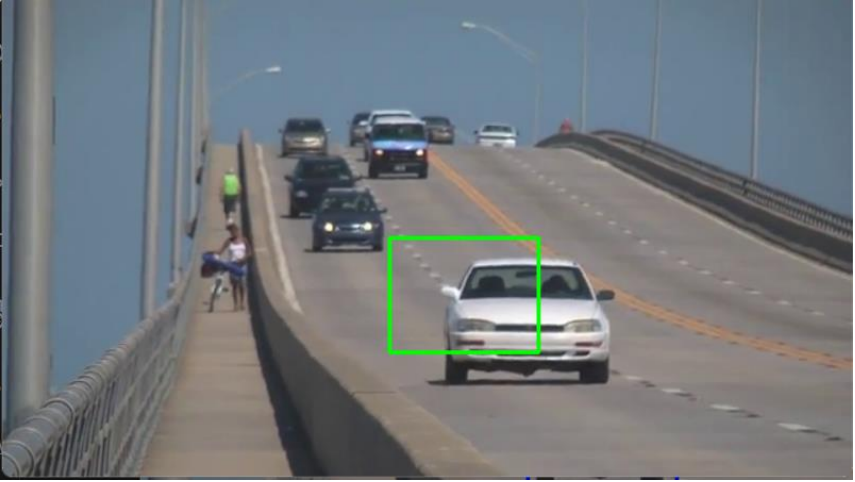



칼만 필터(Kalman Filter)를 초기화합니다.
동영상 파일을 열고 첫 프레임에서 추적할 객체를 선택합니다.
선택한 객체의 초기 위치를 설정하고, 칼만 필터를 사용하여 객체 위치를 추정합니다.
추정된 객체 위치를 프레임에 사각형으로 표시합니다.
프레임을 반복적으로 읽어와 객체 위치 추적 및 시각화를 수행하며, "q" 키를 누르면 종료합니다.

칼만 필터를 사용하여 객체를 추적하는 이 코드는 객체의 위치 추정에 노이즈가 많은 경우에도 상대적으로 부드럽고 정확한 추적을 제공할 수 있습니다.